In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
%matplotlib inline

In [268]:
data18 = pd.read_csv('Precipitation data(csv)/Preci18.csv')
data19 = pd.read_csv('Precipitation data(csv)/Preci19.csv')
data20 = pd.read_csv('Precipitation data(csv)/Preci20.csv')
masterdata = pd.concat([data18,data19,data20])
masterdata = masterdata.reset_index()
del masterdata['Unnamed: 0']
del masterdata['index']

In [269]:
masterdata

,Date,precipitationCal,Month_name
0,2018-06-01 00:00:00,0.036,June
1,2018-06-01 00:30:00,0.056,June
2,2018-06-01 01:00:00,0.065,June
3,2018-06-01 01:30:00,0.051,June
4,2018-06-01 02:00:00,0.030,June
...,...,...,...
11995,2020-08-10 21:30:00,1.841,August
11996,2020-08-10 22:00:00,1.599,August
11997,2020-08-10 22:30:00,2.377,August
11998,2020-08-10 23:00:00,2.321,August


In [270]:
masterdata['Date'] = masterdata['Date'].astype('datetime64')
masterdata['doy'] = masterdata['Date'].dt.dayofyear.astype(str) + '-' + masterdata['Date'].dt.hour.astype(str) + '-' + masterdata['Date'].dt.minute.astype(str)
masterdata['Y'] = masterdata['Date'].dt.year
masterdata.head()

,Date,precipitationCal,Month_name,doy,Y
0,2018-06-01 00:00:00,0.036,June,152-0-0,2018
1,2018-06-01 00:30:00,0.056,June,152-0-30,2018
2,2018-06-01 01:00:00,0.065,June,152-1-0,2018
3,2018-06-01 01:30:00,0.051,June,152-1-30,2018
4,2018-06-01 02:00:00,0.030,June,152-2-0,2018


In [271]:
piv =masterdata.pivot(index = 'doy', columns = 'Y', values = 'precipitationCal')
piv['plotdate'] = piv.index
piv['plotdate'] = pd.to_datetime(piv.plotdate,format='%j-%H-%M')
piv.head()

Y,2018,2019,2020,plotdate
doy,,,,
152-0-0,0.036,0.0,NaN,1900-06-01 00:00:00
152-0-30,0.056,0.0,NaN,1900-06-01 00:30:00
152-1-0,0.065,0.0,NaN,1900-06-01 01:00:00
152-1-30,0.051,0.0,NaN,1900-06-01 01:30:00
152-10-0,6.418,0.0,NaN,1900-06-01 10:00:00


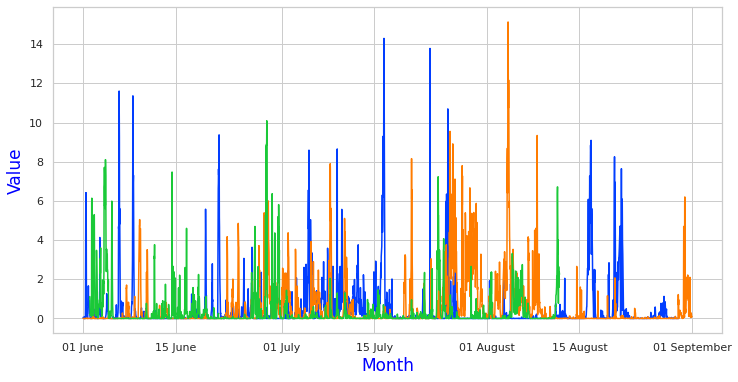

In [272]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate, piv[2018])
sns.lineplot(piv.plotdate, piv[2019])
sns.lineplot(piv.plotdate, piv[2020])
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.show()

In [273]:
piv['18sum'] = piv[2018].cumsum()
piv['19sum'] = piv[2019].cumsum()
piv['20sum'] = piv[2020].cumsum()
piv['month'] = piv.plotdate.dt.month
piv['week'] = piv.plotdate.dt.week

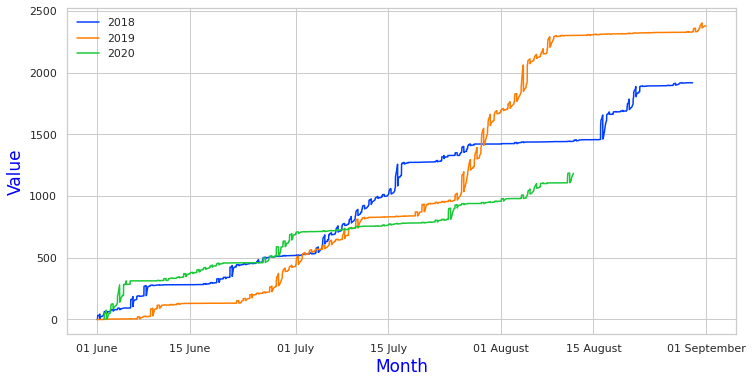

In [274]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate, piv['18sum'],label = '2018')
sns.lineplot(piv.plotdate, piv['19sum'],label = '2019')
sns.lineplot(piv.plotdate, piv['20sum'],label = '2020')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.show()

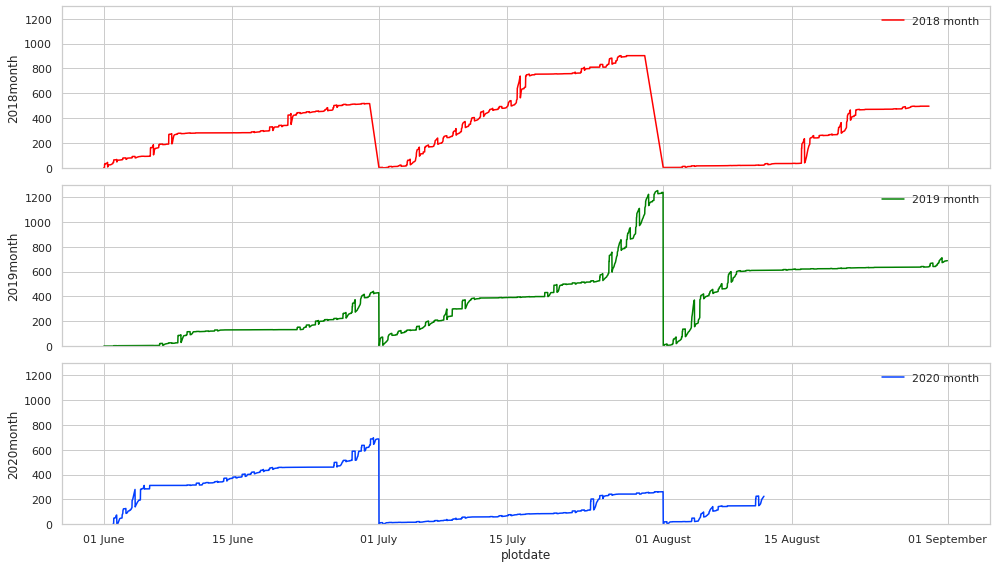

In [275]:
piv['2018month']=piv.groupby('month')[2018].cumsum()
piv['2019month']=piv.groupby('month')[2019].cumsum()
piv['2020month']=piv.groupby('month')[2020].cumsum()
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8),sharex=True)
sns.lineplot(piv.plotdate,piv['2018month'],label = '2018 month',ax=ax1,color='red')
sns.lineplot(piv['plotdate'],piv['2019month'],label = '2019 month',ax=ax2,color='green')
sns.lineplot(piv['plotdate'],piv['2020month'],label = '2020 month',ax=ax3)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(0,1300)
ax2.set_ylim(0,1300)
ax3.set_ylim (0,1300)
plt.tight_layout()
plt.show()

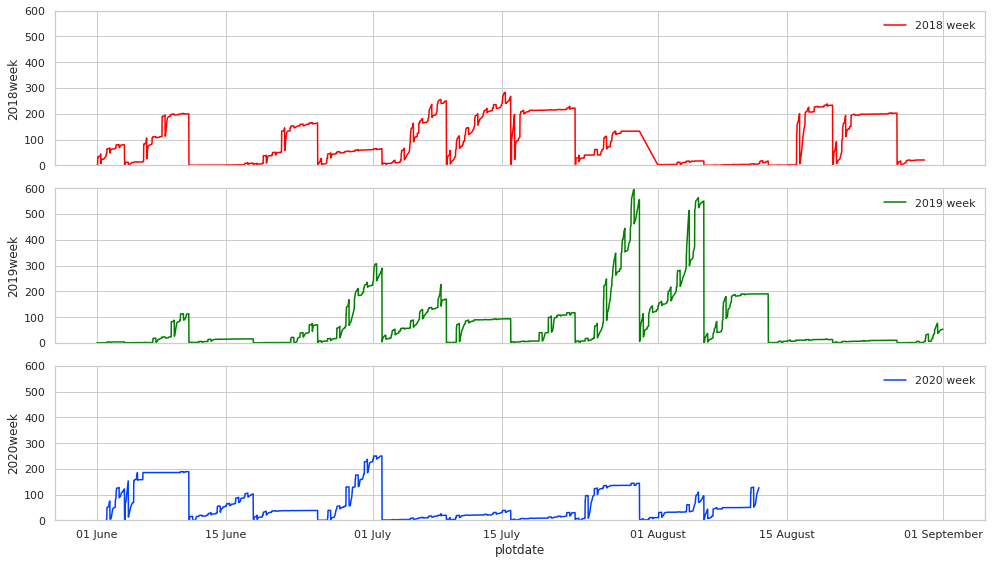

In [236]:
piv['2018week']=piv.groupby('week')[2018].cumsum()
piv['2019week']=piv.groupby('week')[2019].cumsum()
piv['2020week']=piv.groupby('week')[2020].cumsum()
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8),sharex=True)
sns.lineplot(piv['plotdate'],piv['2018week'],label = '2018 week',ax=ax1,color='red')
sns.lineplot(piv['plotdate'],piv['2019week'],label = '2019 week',ax=ax2,color='green')
sns.lineplot(piv['plotdate'],piv['2020week'],label = '2020 week',ax=ax3)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(0,600)
ax2.set_ylim(0,600)
ax3.set_ylim (0,600)
ax.tick_params(axis='both', which='major', labelsize=15)
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [277]:
piv['1819m'] = np.sqrt(abs(np.square(piv['2018month']) - np.square(piv['2019month'])))
piv['1920m'] = np.sqrt(abs(np.square(piv['2019month']) - np.square(piv['2020month'])))
piv['1820m'] = np.sqrt(abs(np.square(piv['2018month']) - np.square(piv['2020month'])))

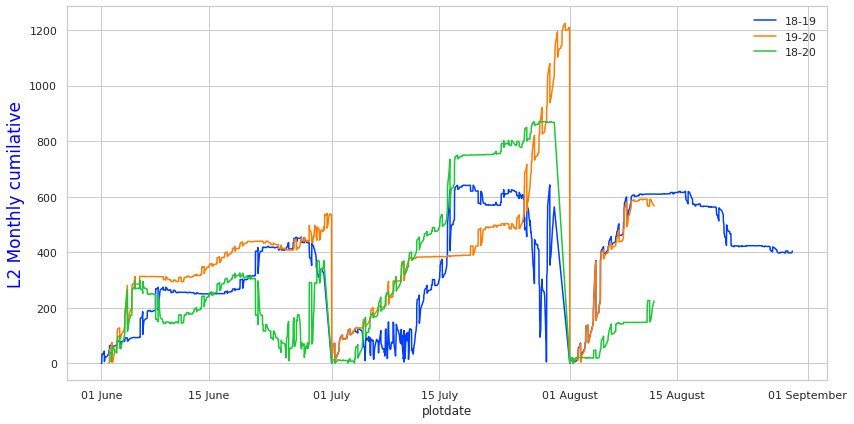

In [278]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate,piv['1819m'], label = '18-19')
sns.lineplot(piv.plotdate,piv['1920m'], label = '19-20')
sns.lineplot(piv.plotdate,piv['1820m'], label = '18-20')
ax.set_ylabel('L2 Monthly cumilative', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [279]:
piv['18st'] = piv[2018].mean()
piv['18st'] = piv['18st'].cumsum()
piv['19st'] = piv[2019].mean()
piv['19st'] = piv['19st'].cumsum()
piv['20st'] = piv[2020].mean()
piv['20st'] = piv['20st'].cumsum()
piv.head(2)

Y,2018,2019,2020,plotdate,18sum,19sum,20sum,month,week,2018month,2019month,2020month,1819m,1920m,1820m,18st,19st,20st
doy,,,,,,,,,,,,,,,,,,
152-0-0,0.036,0.0,NaN,1900-06-01 00:00:00,0.036,0.0,NaN,6,22,0.036,0.0,NaN,0.036,NaN,NaN,0.459626,0.544408,0.348362
152-0-30,0.056,0.0,NaN,1900-06-01 00:30:00,0.092,0.0,NaN,6,22,0.092,0.0,NaN,0.092,NaN,NaN,0.919251,1.088815,0.696724


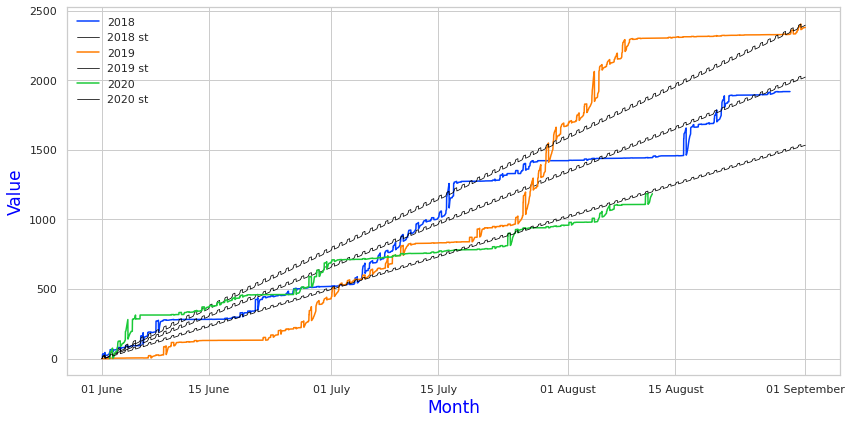

In [280]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate, piv['18sum'],label = '2018')
sns.lineplot(piv.plotdate, piv['18st'],label = '2018 st',color='black',linewidth=0.75)
sns.lineplot(piv.plotdate, piv['19sum'],label = '2019')
sns.lineplot(piv.plotdate, piv['19st'],label = '2019 st',color='black',linewidth=0.75)
sns.lineplot(piv.plotdate, piv['20sum'],label = '2020')
sns.lineplot(piv.plotdate, piv['20st'],label = '2020 st',color='black',linewidth=0.75)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [281]:
piv['18L2'] = np.sqrt(abs(np.square(piv['18sum']) - np.square(piv['18st'])))
piv['19L2'] = np.sqrt(abs(np.square(piv['19sum']) - np.square(piv['19st'])))
piv['20L2'] = np.sqrt(abs(np.square(piv['20sum']) - np.square(piv['20st'])))
piv['18dif'] = abs(piv['18sum'] - piv['18st'])
piv['19dif'] = abs(piv['19sum'] - piv['19st'])
piv['20dif'] = abs(piv['20sum'] - piv['20st'])

[]

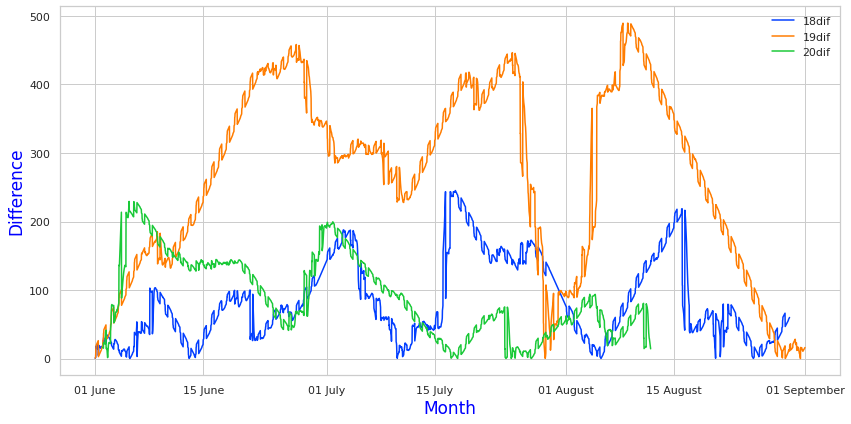

In [282]:
fig, ax = plt.subplots(1,1,figsize = (12,6))
sns.lineplot(piv.plotdate,piv['18dif'],label = '18dif')
sns.lineplot(piv.plotdate,piv['19dif'],label = '19dif')
sns.lineplot(piv.plotdate,piv['20dif'],label = '20dif')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Difference', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.plot()

[]

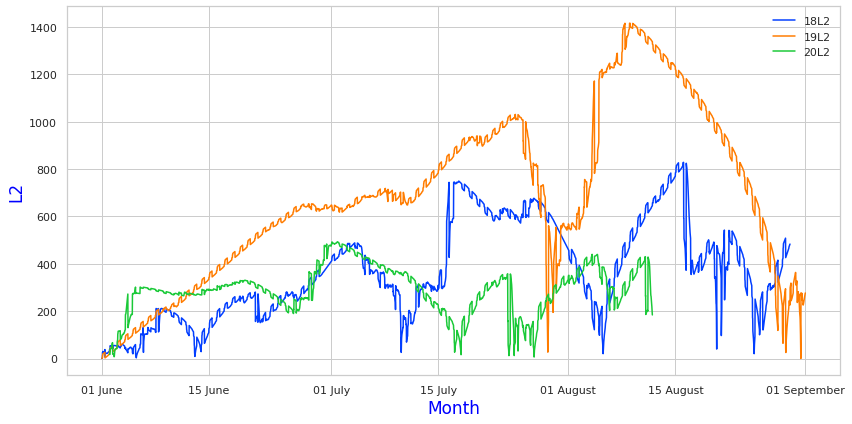

In [283]:
fig, ax = plt.subplots(1,1,figsize = (12,6))
sns.lineplot(piv.plotdate,piv['18L2'],label = '18L2')
sns.lineplot(piv.plotdate,piv['19L2'],label = '19L2')
sns.lineplot(piv.plotdate,piv['20L2'],label = '20L2')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('L2', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.plot()